In [1]:
# load the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib

print("numpy", np.__version__)
print("pandas", pd.__version__)
print("sklearn", sklearn.__version__)
print("matplotlib", matplotlib.__version__)


numpy 1.26.4
pandas 2.2.2
sklearn 1.4.2
matplotlib 3.8.4


In [5]:
df = pd.read_csv("spam.csv", encoding_errors="replace")

df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [9]:
# Pipeline-
# data gradthering -> data cleaning-> EDA->Text preprocessing -> text vectorization->modal building-> Inprovement ->website-> deploy

# 1. Data Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
# drop the last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)

In [16]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# rename the column name
df.rename(columns={'v1':'target','v2':'mail'},inplace=True)

In [20]:
df.head()

,target,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
# find the missing value
df.isnull().sum()

target    0
mail      0
dtype: int64

In [24]:
# no null value is present in data


In [26]:
# find the duplicated value
df.duplicated().sum()

403

In [28]:
# drop  the duplicated value
df = df.drop_duplicates(keep='first')

In [30]:
df.duplicated().sum()

0

In [32]:
df.shape

(5169, 2)

In [34]:
df.head()

,target,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
# then the apply the label encoder then target column is converted in numerical because machine learning algorithem work on numerical data
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['target']=lb.fit_transform(df['target'])

# 2. EDA

In [39]:
df.head()

,target,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
# count the value of target columnhoe much are email are spam or not spam (0 represent a not spam and 1 represent a spam)

In [43]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

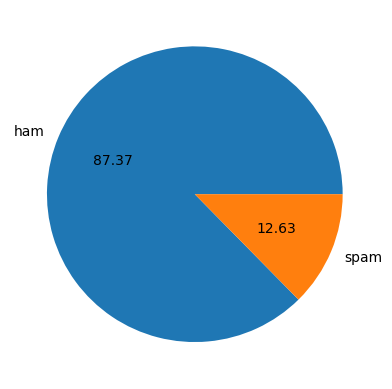

In [45]:
#  to plot the data
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [46]:
# data are impblanced so can handle carefilly

<Axes: ylabel='Count'>

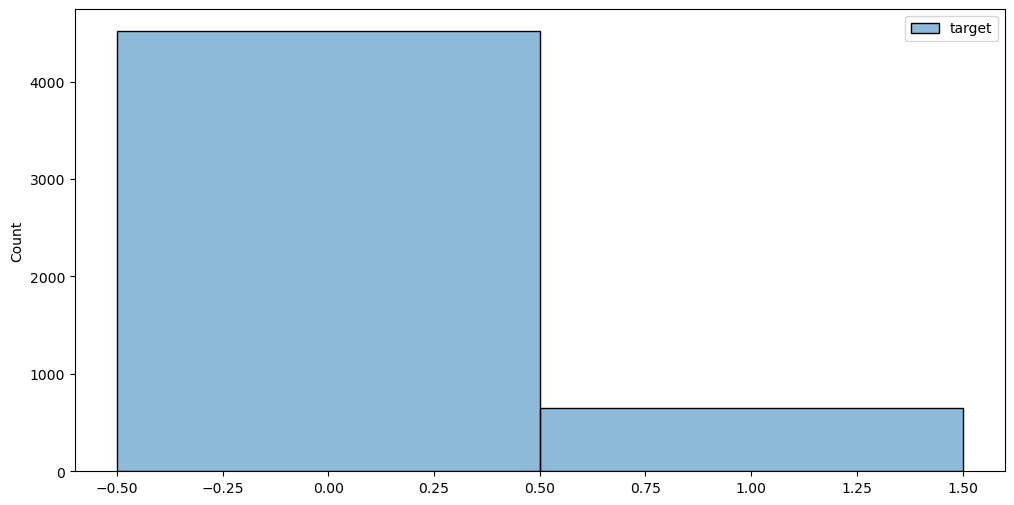

In [49]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0])
sns.histplot(df[df['target'] == 1],color='red')

In [53]:

import nltk

In [54]:
!pip install nltk

In [55]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
df['num_characters'] = df['mail'].apply(len)

In [61]:
df.head()

,target,mail,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [63]:
df[['num_characters']].describe()

,num_characters
count,5169.000000
mean,78.923776
std,58.174846
min,2.000000
25%,36.000000
50%,60.000000
75%,117.000000
max,910.000000


<Axes: xlabel='num_characters', ylabel='Count'>

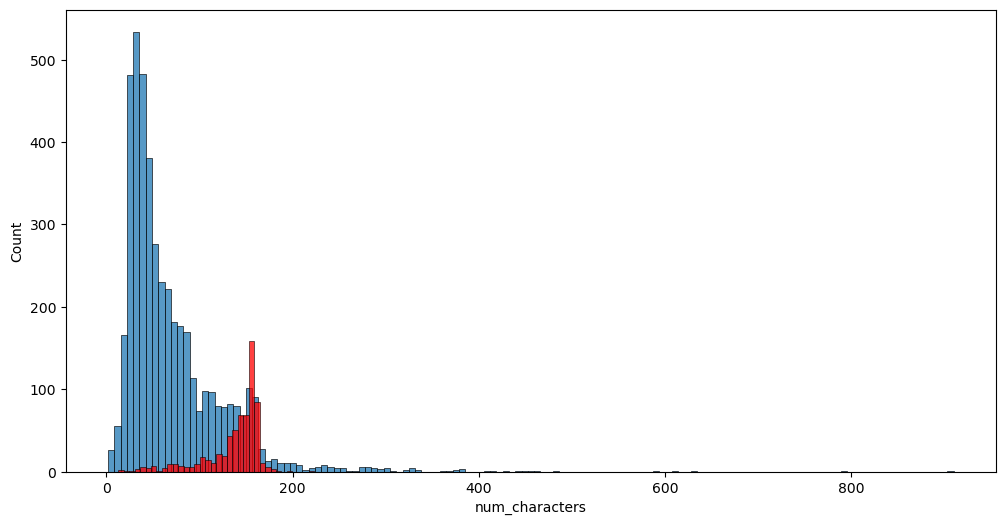

In [65]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

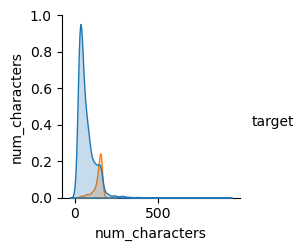

In [67]:
sns.pairplot(df,hue='target')

# 3.text preprocessing

In [70]:
# 1.lowercse
# 2.Removing special characters
# 3.Removing stop words and punctuation
# 4.Tokenization
# 5.stemming

In [72]:
import nltk
nltk.download('punkt')  # This is already in your code
nltk.download('stopwords')  # This is also in your code
nltk.download('averaged_perceptron_tagger')  # For proper tokenization


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [74]:
# 1.Lower case
def textloew(text):
    text=text.lower()
    return text

In [76]:
df['mail']=df['mail'].apply(textloew)

In [78]:
df.head()

,target,mail,num_characters
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


In [80]:
# 2.Removing the special character/puncation

In [82]:
import string

In [84]:
ex=string.punctuation

In [86]:
def remove_pun(text):
    return text.translate(str.maketrans("", "",ex))

In [88]:
df['mail']=df['mail'].apply(remove_pun)

In [90]:
df.head()

,target,mail,num_characters
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i dont think he goes to usf he lives aroun...,61


In [92]:
# 3. stop word remove

In [94]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Define function to remove stopwords
def remove_stopwords(text):
    words = text.split()  # Tokenize by splitting at spaces
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stopwords
    return " ".join(filtered_words)  # Join words back into a sentence

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
df['mail']=df['mail'].apply(remove_stopwords)

In [98]:
df.head()

,target,mail,num_characters
0,0,go jurong point crazy available bugis n great ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry 2 wkly comp win fa cup final tkts 2...,155
3,0,u dun say early hor u c already say,49
4,0,nah dont think goes usf lives around though,61


In [100]:
# 4. tokenization

In [102]:
import nltk

In [104]:
from nltk.tokenize import word_tokenize


In [106]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [108]:
import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK data if not already available
nltk.download('punkt')

# Define function for word tokenization
def tokenize_words(text):
    return word_tokenize(text)  # Tokenizes the text into words



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [110]:
df['mail'] = df['mail'].apply(tokenize_words)

In [112]:
df.head()

,target,mail,num_characters
0,0,"[go, jurong, point, crazy, available, bugis, n...",111
1,0,"[ok, lar, joking, wif, u, oni]",29
2,1,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",155
3,0,"[u, dun, say, early, hor, u, c, already, say]",49
4,0,"[nah, dont, think, goes, usf, lives, around, t...",61


In [114]:
# 5. Stemming

In [116]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [118]:
def porter_stemming(words):
    return [stemmer.stem(word) for word in words] 
    

In [120]:
df['mail'] = df['mail'].apply(porter_stemming)

In [121]:
df.head()

,target,mail,num_characters
0,0,"[go, jurong, point, crazi, avail, bugi, n, gre...",111
1,0,"[ok, lar, joke, wif, u, oni]",29
2,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",155
3,0,"[u, dun, say, earli, hor, u, c, alreadi, say]",49
4,0,"[nah, dont, think, goe, usf, live, around, tho...",61


# 4.Text vecterizer-> to convert the text data in numbrical data

In [123]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
df['mail'] = df['mail'].apply(lambda words: " ".join(words))

In [127]:
x = tfidf.fit_transform(df['mail']).toarray()

In [129]:
x.shape

(5169, 3000)

In [131]:
y=df['target'].values

In [133]:
#  train test split

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# 5.Model building

In [138]:
from sklearn.naive_bayes import GaussianNB ,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [140]:
gb=GaussianNB()
mb=MultinomialNB()
bn=BernoulliNB()

In [142]:
gb.fit(x_train,y_train)
y_pred1 = gb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
# accuracy is vaild but precision and confusion metric are not perfect

0.8684719535783365
0.5043478260869565
[[782 114]
 [ 22 116]]


In [143]:
mb.fit(x_train,y_train)
y_pred2 = mb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
# accuracy is excellent but precision and confusion metric are also excellent

0.9748549323017408
1.0
[[896   0]
 [ 26 112]]


In [146]:
bn.fit(x_train,y_train)
y_pred3 = bn.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
# accuracy is excellent but precision and confusion metric are also excellent

0.9825918762088974
0.9918032786885246
[[895   1]
 [ 17 121]]


In [148]:
# better tf-idf->navie bayes multinomial

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [152]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [154]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'GBDT':gbdt,
    
}

In [156]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [158]:
train_classifier(svc,x_train,y_train,x_test,y_test)
# multinomial navie bayes is better

(0.9748549323017408, 0.9666666666666667)

In [159]:
train_classifier(knc,x_train,y_train,x_test,y_test)
# multinomial navie bayes is better

(0.9032882011605415, 1.0)

In [160]:
# multinomial naive bayes 
train_classifier(mnb,x_train,y_train,x_test,y_test)

(0.9748549323017408, 1.0)

In [161]:
train_classifier(dtc,x_train,y_train,x_test,y_test)
# multinomial navie bayes is better

(0.9313346228239845, 0.8316831683168316)

In [162]:
train_classifier(lrc,x_train,y_train,x_test,y_test)
# multinomial navie bayes is better

(0.9564796905222437, 0.9428571428571428)

In [163]:
train_classifier(rfc,x_train,y_train,x_test,y_test)
# multinomial navie bayes is better

(0.9709864603481625, 0.9821428571428571)

In [164]:
train_classifier(abc,x_train,y_train,x_test,y_test)
# multinomial navie bayes is better

C:\Users\dell\.conda\jupter\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(0.960348162475822, 0.9369369369369369)

In [ ]:
train_classifier(bc,x_train,y_train,x_test,y_test)
# multinomial navie bayes is better

In [ ]:
train_classifier(gbdt,x_train,y_train,x_test,y_test)
# multinomial navie bayes is better

In [162]:
import pickle

In [164]:
pickle.dump(mnb,open('model1.pkl','wb'))
pickle.dump(tfidf,open('vectorizer1.pkl','wb'))